In [1]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df1 = pd.read_csv(mouse_drug_data_to_load)
df2 = pd.read_csv(clinical_trial_data_to_load)
#encoding="ISO-8859-1

# Combine the data into a single dataset
merge_table = pd.merge(df1, df2, on="Mouse ID", how="inner")
merge_table.head(20)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


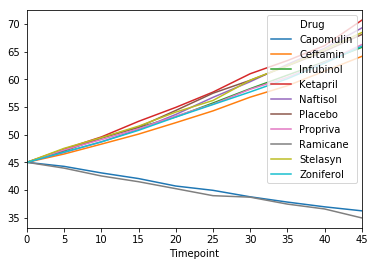

In [14]:
#Create groupby object and convert to dataframe;"tumor vol vs timepoint" for each drug 
grouped_data_vol_df = merge_table.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
grouped_data_vol_df.head(20)

#convert dataframe to pivot table so we can have each column represent a different drug; rows are timepoint
tumorvol_pivot = pd.pivot_table(grouped_data_vol_df, values = 'Tumor Volume (mm3)', index = ['Timepoint'], columns = 'Drug')
tumorvol_pivot.head(100)


#plot "tumor vol vs timepoint" for each drug
tumorvol_pivot.plot()

In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

#Syntax : DataFrame.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)

#grouped_data.sem(axis=0, skipna=False)
# Convert to DataFrame

# Preview DataFrame

In [ ]:
#Create groupby object and convert to dataframe; "metastatic (cancer spreading) sites vs timepoint" for each drug
grouped_data_metastatic_df = merge_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

#convert dataframe to pivot table so we can have each column represent a different drug; rows are timepoint
metatastic_pivot = pd.pivot_table(grouped_data_metastatic_df, values = 'Metastatic Sites', index = ['Timepoint'], columns = 'Drug')
grouped_data_metastatic_df.head()
#plot "metastatic (cancer spreading) sites vs timepoint" for each drug
metatastic_pivot.plot()

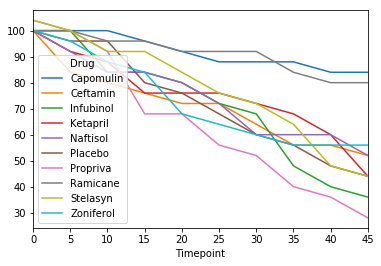

In [15]:
#Creating a scatter plot that shows the number of mice still alive
#through the course of treatment (Survival Rate)

#Create groupby object and convert to dataframe; current output is #of mice alive
grouped_data_micenum_df = merge_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].count().reset_index()

#Create copy of dataframe so we can add a column containing Survival Rates
grouped_data_survivalrate_df = grouped_data_micenum_df

#Calculate percentage of mice remaining and store output in new column named 'Survival Rate'
grouped_data_survivalrate_df['Survival Rate'] = grouped_data_survivalrate_df['Metastatic Sites']/25*100
grouped_data_survivalrate_df.head(20)

#convert dataframe to pivot table so we can have each column represent a different drug; rows are timepoint
#output is now Survival Rate (percentage of mice remaining)  
micenum_pivot = pd.pivot_table(grouped_data_survivalrate_df, values = 'Survival Rate', index = ['Timepoint'], columns = 'Drug')
micenum_pivot.head(20)


micenum_pivot.plot()





In [ ]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days

#Create groupby object and convert to dataframe;"tumor vol vs timepoint" for each drug 
grouped_data_vol_df = merge_table.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
grouped_data_vol_df.head(20)

#convert dataframe to pivot table so we can have each column represent a different drug; rows are timepoint
tumorvol_pivot = pd.pivot_table(grouped_data_vol_df, values = 'Tumor Volume (mm3)', index = ['Timepoint'], columns = 'Drug')
tumorvol_pivot.head(100)


#plot "tumor vol vs timepoint" for each drug
tumorvol_pivot.plot()